# Finding of Over- and Underpriced Houses

## Boxplot and Whiskers

### Prepare Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
houses = pd.read_csv("kc_house_data_categories.csv")

#print head of data
houses.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,renovated,Category
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,0,2
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,0,2
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,0,4
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,0,5


### Boxplot to illustrate outliers

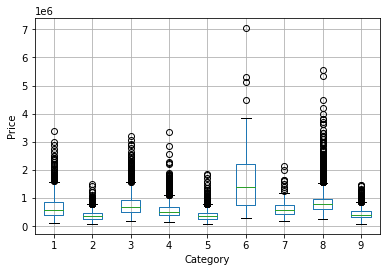

In [2]:
# Boxplot to find over and underpriced houses
houses.boxplot(column=['price'], by=['Category'])
plt.ylabel('Price')
plt.xlabel('Category')
plt.title('')
plt.suptitle('')
plt.savefig('../Paper/Boxplot.png')
plt.show()

### Find upper whiskers for each category

In [3]:
# subset of houses with certain category
cat=houses.loc[houses["Category"]==1,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper1=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==2,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper2=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==3,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper3=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==4,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper4=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==5,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper5=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==6,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper6=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==7,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper7=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==8,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper8=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==9,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper9=quartiles[1]+1.5*IQR

######################################################

#All upper whiskers
print(upper1)
print(upper2)
print(upper3)
print(upper4)
print(upper5)
print(upper6)
print(upper7)
print(upper8)
print(upper9)

1582812.5
795000.0
1578125.0
1114625.0
777500.0
4367500.0
1215075.0
1550000.0
856875.0


### Add an indicator for overpriced houses using whiskers to the data

In [4]:
#function to add new column to data frame based on conditions
def overpriced(df):

    if (df['Category']==1 and df['price']>upper1):
        return 1
    elif (df['Category']==2 and df['price']>upper2):
        return 1
    elif (df['Category']==3 and df['price']>upper3):
        return 1
    elif (df['Category']==4 and df['price']>upper4):
        return 1
    elif (df['Category']==5 and df['price']>upper5):
        return 1
    elif (df['Category']==6 and df['price']>upper6):
        return 1
    elif (df['Category']==7 and df['price']>upper7):
        return 1
    elif (df['Category']==8 and df['price']>upper8):
        return 1
    elif (df['Category']==9 and df['price']>upper9):
        return 1
    else :
        return 0
    
#apply function
houses['overpricedWhisker'] = houses.apply(overpriced, axis = 1)


### Summary statistics

In [5]:
#Total houses who are overprived
print(houses['overpricedWhisker'].value_counts())

#Dataframe with per category statistics

#categories
categories=list(range(1,10))

#total number of houses per category
housesPerCategory=list(houses.groupby("Category")["Category"].count())

#overpriced houses per category
overpricedPerCategory=list(houses.loc[houses['overpricedWhisker']==1,].groupby(["Category"])["overpricedWhisker"].count())

#share of overpriced houses
overpricedShare=["{:.2%}".format(int(b) / int(m)) for b,m in zip(overpricedPerCategory, housesPerCategory)]

#data frame
overpricedHouses=pd.DataFrame(data=zip(housesPerCategory,overpricedPerCategory,overpricedShare),
                             columns=['Houses', 'Overpriced Houses', 'Share'],
                             index=categories)
display(overpricedHouses)
with open('overpricedHouses.tex','w') as tf:
    tf.write(overpricedHouses.to_latex())

0    20775
1      812
Name: overpricedWhisker, dtype: int64


,Houses,Overpriced Houses,Share
1,844,47,5.57%
2,4739,79,1.67%
3,1339,68,5.08%
4,3254,140,4.30%
5,3346,136,4.06%
6,162,4,2.47%
7,229,9,3.93%
8,2843,238,8.37%
9,4831,91,1.88%


## Kernel Density Estimation

### Example of how to detect outliers with category one houses

In the following gaussian kernel density estimation will be conducted to smooth the price distribution

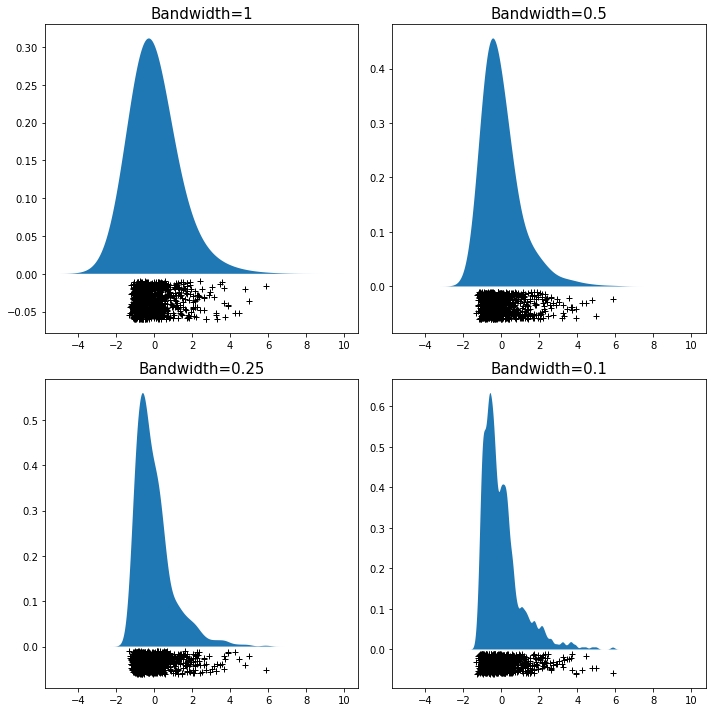

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity

#select category one observations
index=houses[houses['Category']==1].index
prices=houses.loc[houses['Category']==1,  ['price']].values
prices

#standardize prices
scaledPrices=StandardScaler().fit_transform(prices)

# create x axis points
x_test = np.linspace(-5, 10, 2000)[:, np.newaxis]

#define plot structure to create four plots
fig, axs = plt.subplots(2, 2, figsize=(10,10))


#calculate log density scores for x axis points with different bandwidths
for i in [1,0.5,0.25,0.1]:
    
    #fit kernel to scaled price points
    kde = KernelDensity(kernel='gaussian', bandwidth=i).fit(scaledPrices)
    
    #calculate log density of points lying within the kernels and write as new column to data frame
    log_dens = kde.score_samples(x_test)
    
    if i==1:
        #plot gaussian density distribution
        axs[0, 0].fill(x_test, np.exp(log_dens))
        axs[0, 0].plot(scaledPrices, -0.01 - 0.05 * np.random.random(scaledPrices.shape[0]), '+k')
        axs[0,0].set_title('Bandwidth='+str(i), size=15)
        
    if i==0.5:
        #plot gaussian density distribution
        axs[0, 1].fill(x_test, np.exp(log_dens))
        axs[0, 1].plot(scaledPrices, -0.01 - 0.05 * np.random.random(scaledPrices.shape[0]), '+k')
        axs[0, 1].set_title('Bandwidth='+str(i), size=15)
        
    if i==0.25:
        #plot gaussian density distribution
        axs[1, 0].fill(x_test, np.exp(log_dens))
        axs[1, 0].plot(scaledPrices, -0.01 - 0.05 * np.random.random(scaledPrices.shape[0]), '+k')
        axs[1, 0].set_title('Bandwidth='+str(i), size=15)
        
    if i==0.1:
        #plot gaussian density distribution
        axs[1, 1].fill(x_test, np.exp(log_dens))
        axs[1, 1].plot(scaledPrices, -0.01 - 0.05 * np.random.random(scaledPrices.shape[0]), '+k')
        axs[1, 1].set_title('Bandwidth='+str(i), size=15)
        
    fig.tight_layout()
    plt.savefig('../Paper/GaussianDensity.png')


### Detect outliers for all categories

1
2
3
4
5
6
7
8
9
loop finished


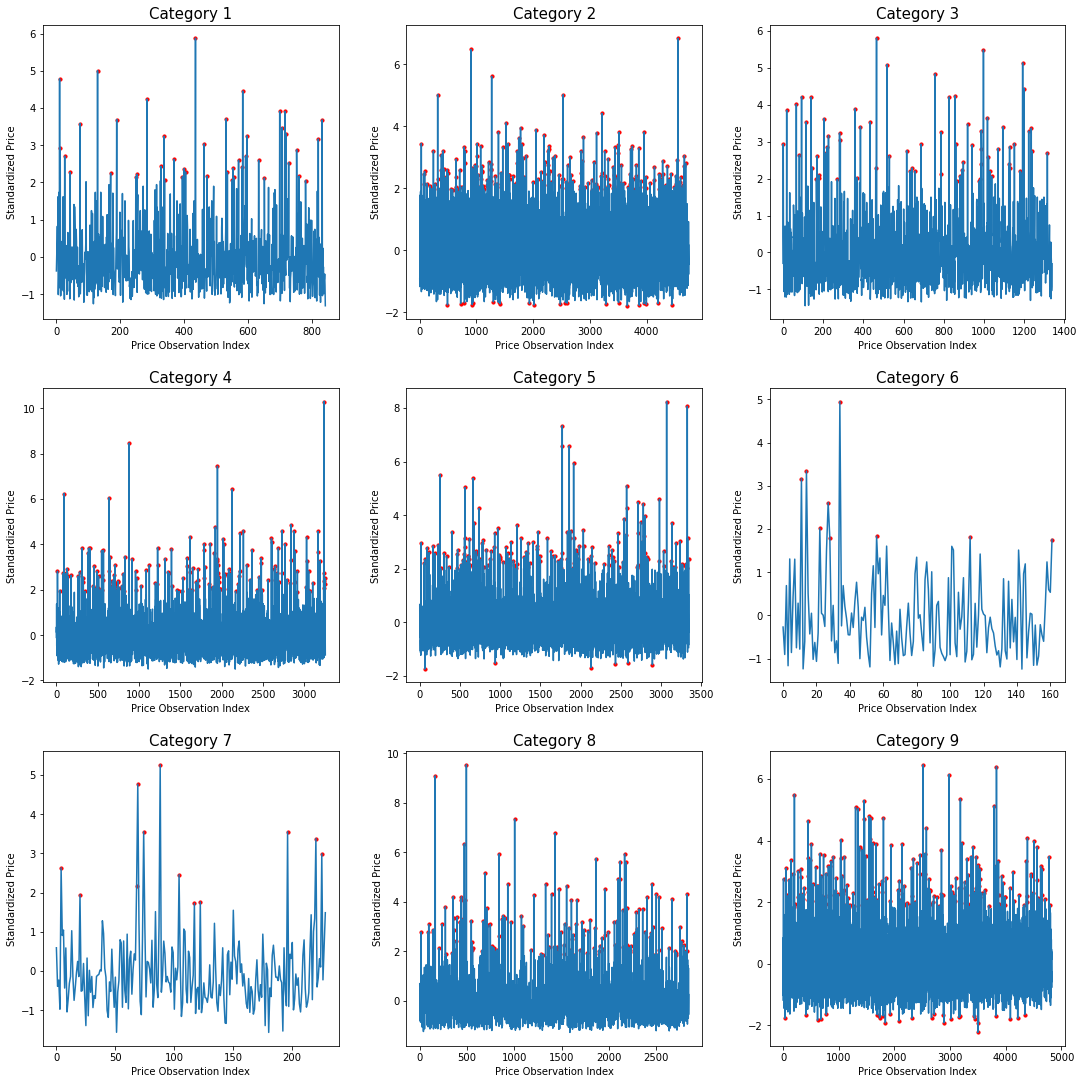

In [14]:
#define plot structure to create four plots
fig, axs = plt.subplots(3,3, figsize=(15,15))

#define function which assigns each category to a plot location
import math  
def plotAssignment(i):
    
    x=math.ceil(i/3)-1
    if i in [1,4,7]:
        y=0
    if i in [2,5,8]:
        y=1
    if i in [3,6,9]:
        y=2
    return x,y

#empty lists to add indexes of overpriced and underpriced observations
overpricedList=list()
underpricedList=list()

#loop to find outliers, plot them and assign them to data
for i in list(range(1,10)):
    
    print(i)
    
    #extract houses of category i
    
    #index of category one houses entry in houses table
    index=houses[houses['Category']==i].index
    
    #prices of category one houses
    prices=houses.loc[houses['Category']==i,  ['price']].values
    
    #standardize prices
    scaledPrices=StandardScaler().fit_transform(prices)
    
    #fit kernel with bandwith of 0.25 to scaled price points
    kde = KernelDensity(kernel='gaussian', bandwidth=0.25).fit(scaledPrices)
    
    #calculate log density scores of data points
    log_dens = kde.score_samples(scaledPrices)
    
    #calculate the 5%-percentile of log density scores
    thresh = np.quantile(log_dens, 0.05)
    
    #define the index of log density scores which lie below the 5%-percentile as index of outlier values
    outlierIndex = np.where(log_dens <= thresh)
    
    #define the outlier value
    outliers = scaledPrices[outlierIndex]
    
    #complete index over all prices
    completeIndex = range(scaledPrices.shape[0])
    
    
    ##create plots with outliers
    x,y = plotAssignment(i)
    axs[x,y].plot(completeIndex, scaledPrices)
    axs[x,y].scatter(outlierIndex,outliers, color='r', s=10)
    axs[x,y].set_title('Category '+str(i), size=15)

    #add labels to axis
    for ax in axs.flat:
        ax.set(xlabel='Price Observation Index', ylabel='Standardized Price')
        
    #layout and save plot
    fig.tight_layout(pad=0.5, w_pad=2, h_pad=2)
    plt.savefig('../Paper/DensityOutliers.png')

    
    ## Information about over- and underpriced houses
    
    #index of outlier observations in original dataframe
    indexOutliersOriginal=np.array([index[outlierIndex]]).T
    
    #overpriced observations list which is extended in each iteration
    overpriced=outliers>0
    overpricedList.extend(indexOutliersOriginal[overpriced])
    
    #underpriced houses list which is extendend in each iteration
    underpriced=outliers<0
    underpricedList.extend(indexOutliersOriginal[underpriced])
    
        
print('loop finished') 

#Add information about over and underpriced houses to data frame   

#data frame containing all overpriced houses
overpricedDf=pd.DataFrame(len(overpricedList)*[1],
                          columns =['overpricedKDE'],
                          index=overpricedList)


#join overpriced dataframe to houses data frame
result=pd.concat([houses, overpricedDf], axis=1)
result['overpricedKDE'] = result['overpricedKDE'].fillna(0)
result['overpricedKDE'] = result[['overpricedKDE']].astype(int)

#data frame containing all overpriced houses
underpricedDf=pd.DataFrame(len(underpricedList)*[1],
                          columns =['underpricedKDE'],
                          index=underpricedList)

#join overpriced dataframe to houses data frame
result=pd.concat([result, underpricedDf], axis=1)
result['underpricedKDE'] = result['underpricedKDE'].fillna(0)
result['underpricedKDE'] = result[['underpricedKDE']].astype(int)



# Compare the outliers in both methods

In [13]:
#overpriced houses per category according to KDE
overpricedKDE=list(result.loc[result['overpricedKDE']==1,].groupby(["Category"])["overpricedKDE"].count())

#underpriced houses per category according to KDE
underpricedKDE=list(result.groupby(["Category"]).sum()['underpricedKDE'])

#share of overpriced houses
outlierKDEShare=["{:.2%}".format((int(b)+int(n))/ int(m)) for b,n,m in zip(underpricedKDE,overpricedKDE,housesPerCategory)]

#data frame
outlierHousesKDE=pd.DataFrame(data=zip(housesPerCategory,overpricedKDE,underpricedKDE,outlierKDEShare),
                             columns=['Houses', 'Overpriced Houses', 'Underpriced Houses', 'Outlier Share'],
                             index=categories)
display(outlierHousesKDE)
with open('outlierHousesKDE.tex','w') as tf:
    tf.write(outlierHousesKDE.to_latex())

#table showing overlapping outliers for overpriced houses
print(pd.crosstab(result['overpricedWhisker'], result['overpricedKDE'], rownames = ['Whisker Outlier'], colnames = ['KDE Outlier']))


,Houses,Overpriced Houses,Underpriced Houses,Outlier Share
1,844,43,0,5.09%
2,4739,216,21,5.00%
3,1339,68,0,5.08%
4,3254,163,0,5.01%
5,3346,163,6,5.05%
6,162,9,0,5.56%
7,229,12,0,5.24%
8,2843,146,0,5.14%
9,4831,216,28,5.05%


KDE Outlier          0    1
Whisker Outlier            
0                20455  320
1                   96  716
